<a href="https://colab.research.google.com/github/4060e059/TensorFlow/blob/main/TensorFlow_and_tf_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# https://www.tensorflow.org/tutorials/keras/classification

In [4]:
# -*- coding: utf-8 -*-

# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.3.0


In [5]:
## Import載入 the Fashion MNIST dataset

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [6]:
##Loading the dataset returns four NumPy arrays:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [22]:
## Explore the data

train_images.shape #訓練影像的維度

len(train_labels) #訓練標籤的長度

train_labels   #訓練標籤的內容

test_images.shape #待判定影像的維度

len(test_labels)  #訓練標籤的長度

10000

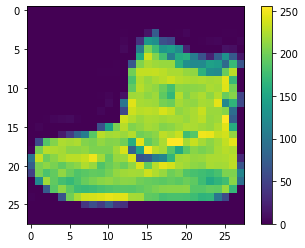

In [8]:
## Preprocess the data

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [20]:
## Scale these values to a range of 0 to 1 before feeding them to the neural network model. 

train_images = train_images / 255.0

test_images = test_images / 255.0

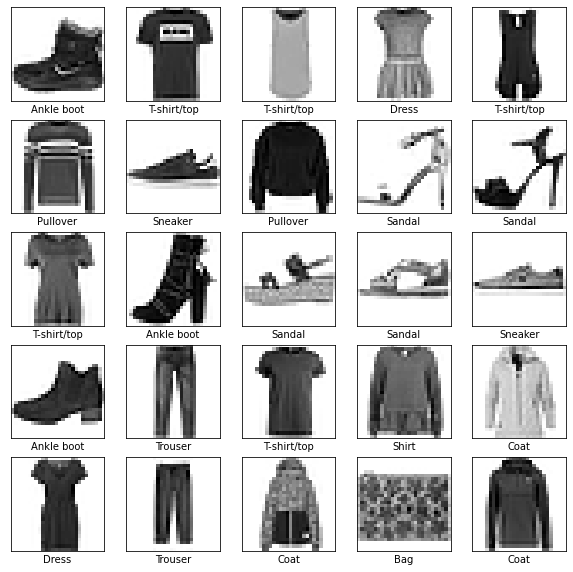

In [21]:
## To verify that the data is in the correct format 

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
## Build the model
## KERAS開發模式: 1.Sequential(堆積木)  2.FUCTIONAL api   3.SUBCLASS(物件導向  子類別)   

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
## 訓練模型

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2290 - accuracy: 0.9135
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2230 - accuracy: 0.9156
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2152 - accuracy: 0.9185
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2085 - accuracy: 0.9200
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2029 - accuracy: 0.9242
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1965 - accuracy: 0.9262
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1933 - accuracy: 0.9277
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1877 - accuracy: 0.9288
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1821 - accuracy: 0.9316
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.177

In [13]:
### Evaluate accuracy


test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3528 - accuracy: 0.8888

Test accuracy: 0.8888000249862671


In [15]:
### Make predictions

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

predictions[0]

np.argmax(predictions[0])

test_labels[0]

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

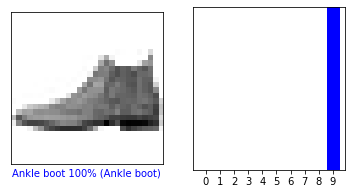

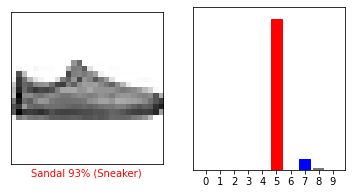

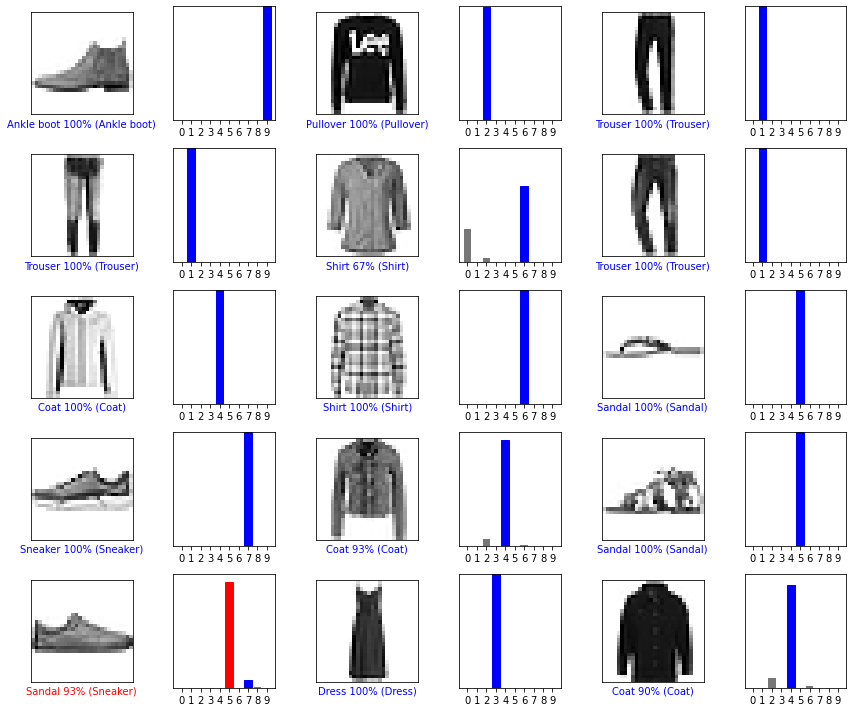

In [18]:
### Verify predictions

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

(28, 28)
(1, 28, 28)
[[5.7739871e-05 2.8684943e-13 9.9716288e-01 8.7025049e-12 1.9090773e-03
  1.2680699e-12 8.7024277e-04 4.4661771e-16 2.4219623e-14 2.2732469e-16]]


2

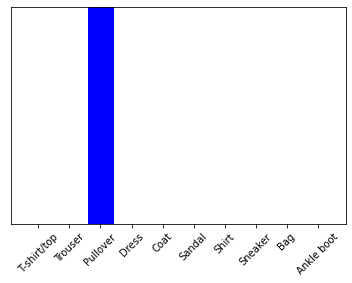

In [19]:
## Use the trained model

# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = probability_model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

np.argmax(predictions_single[0])